# Data Loading and Merging

This section involves loading the product categories and explanations datasets, followed by merging them into a single DataFrame for further analysis.

## Steps:
1. **Data Loading**:
   - Loading `Product_Categories.txt` and `Product_Explanation.txt` into separate DataFrames.
   - Handling any potential errors during the loading process using `try-except`.
2. **Data Merging**:
   - Merging the two DataFrames on the `product_id` column to combine the product descriptions with their respective categories.
3. **Data Display**:
   - Displaying the first few rows of the merged dataset to verify the merge operation.


In [63]:
import pandas as pd

# Load datasets
product_categories = pd.read_csv('Product_Categories.txt', sep=';', header=None, names=['product_id', 'category'], on_bad_lines='skip')
product_explanation = pd.read_csv('Product_Explanation.txt', sep=';', header=None, names=['product_id', 'description'], on_bad_lines='skip')

# Merge datasets on product_id
data = pd.merge(product_explanation, product_categories, on='product_id')

# Display the first few rows of the merged dataset
data.head()


,product_id,description,category
0,116,NaN,TELEKOM > AKILLI TELEFON
1,462,HP Pavilion 11-n000nt Pentium N3540 4GB 750GB ...,Bilgisayar > Taşınabilir Bilgisayarlar
2,1300,"ÖZELLİKLER Ekran Ekran Boyutu 48"" Ekran Boyutu...",Ev Elektroniği > Televizyonlar > SAMSUNG
3,1665,Ürün Kodu : 40061255166 Genel Özellikler Panel...,Bilgisayar > Bilgisayar Parçaları > Monitör > ...
4,2021,NaN,Cep Telefonu > Sony


# Handling Missing Values

In this section, I check for any missing values in the merged dataset and handle them appropriately.

## Steps:
1. **Checking for Missing Values**:
   - I use the `isnull().sum()` method to identify the number of missing values in each column of the DataFrame.
   - Print the count of missing values before handling them.

2. **Dropping Rows with Missing Values**:
   - I use the `dropna(inplace=True)` method to remove any rows that contain missing values.
   - This ensures that our dataset is clean and free of incomplete records.

3. **Verifying Missing Values Handling**:
   - After dropping the rows with missing values, I check again for any remaining missing values using `isnull().sum()`.
   - Print the count of missing values after handling them to verify that all missing values have been addressed.


In [64]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Drop rows with missing values
data.dropna(inplace=True)

# Check for missing values after dropping
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

Missing values before handling:
product_id       0
description    300
category        21
dtype: int64

Missing values after handling:
product_id     0
description    0
category       0
dtype: int64


In [65]:
#Double Check the dataset
data

,product_id,description,category
1,462,HP Pavilion 11-n000nt Pentium N3540 4GB 750GB ...,Bilgisayar > Taşınabilir Bilgisayarlar
2,1300,"ÖZELLİKLER Ekran Ekran Boyutu 48"" Ekran Boyutu...",Ev Elektroniği > Televizyonlar > SAMSUNG
3,1665,Ürün Kodu : 40061255166 Genel Özellikler Panel...,Bilgisayar > Bilgisayar Parçaları > Monitör > ...
5,2485,Özellikler SmartControl Lite ile kolay ekran p...,PC / Monitör > Monitör
6,2495,Genel Özellikler : Seagate Backup Plus ile dij...,Bilgisayar Ürünleri > Veri Depolama > Taşınabi...
...,...,...,...
1444,1040055,Powersupply Gücü :550WGaranti Süresi :24 Ay,Cooler Master 550W RS550-80GAJ3-EU Güç Kaynağı
1446,1040520,Baskı Rengi :MaviYazdırma Teknolojisi :LaserBa...,Canon CRG-731C Toner Kartuş Mavi
1447,1040521,Baskı Rengi :KırmızıYazdırma Teknolojisi :Lase...,Canon CRG-731M Toner Kartuş Kırmızı
1448,1040676,Disk Kapasite Aralığı :2 TB - 4 TBGaranti Süre...,Zyxel NSA-325 2x4TB Disk Destekli Depolama Üni...


## Identifying Duplicate Product Descriptions

In this section, I will identify and display any duplicate product descriptions in the dataset. Duplicate descriptions might indicate potential data quality issues that need to be addressed. Some of the products belong to different categories but have the same descriptions. To increase the number of products in a category, I grouped them into one category. For example, one product belongs to "Isıtma & Soğutma > Radyatörler," and another belongs to "Yağlı Radyatörler > Resim > Fakir > Fakir RF-09 9 Dilimli Yağlı Radyatör." I changed the category of the second product to "Isıtma & Soğutma > Radyatörler." This step will help us when we train and oversample the dataset.

### Steps:

1. **Grouping by Description**:
   - Group the dataset by the `description` column to identify descriptions associated with more than one product.
   - This is achieved using the `groupby('description')` method.

2. **Filtering for Duplicates**:
   - Apply a filter to keep only those groups that contain more than one product.
   - This is done using the `filter(lambda x: len(x) > 1)` method.

3. **Displaying Duplicate Descriptions**:
   - Sort the resulting DataFrame by the `description` column for better readability.
   - The `sort_values(by='description')` method is used to sort the data.

In [66]:
# Group by description and find groups with more than one product
duplicate_descriptions = data.groupby('description').filter(lambda x: len(x) > 1)

# Display the duplicated descriptions
duplicate_descriptions.sort_values(by='description')

,product_id,description,category
1049,592203,". 9-dilim yağlı Radyatör . 230V-50Hz, 1000W/12...",Isıtma & Soğutma > Radyatörler
152,50179,". 9-dilim yağlı Radyatör . 230V-50Hz, 1000W/12...",Yağlı Radyatörler > Resim > Fakir > Fakir RF-0...
1008,574876,2 adet Sıradan manuel bir diş fırçasına göre d...,Diğer Sağlık ürünleri > Resim > Braun > Braun ...
24,9639,2 adet Sıradan manuel bir diş fırçasına göre d...,Ev / Bakım > Sağlık ve Yaşam > Ağız ve Diş Sağ...
230,71633,2400W6 Bar310 gr/dk Turbo Buhar120gr/dk sürekl...,Küçük Ev Aletleri > Ütüler
...,...,...,...
1102,625290,Ürün Hakkında 3D TV Deneyimi S-link 24k altın ...,Aksesuar & Sarf Malz. > Kablolar > HDMI Kabloları
986,561771,"Ürün Hakkında Bu sonbaharda, Warlords of Draen...",PC / Play Station Oyun > Oyun > PC
1117,630595,"Ürün Hakkında Bu sonbaharda, Warlords of Draen...",Hobi & Oyun Konsolları > Oyunlar > PC Oyunu
1251,718143,Ürünün Markası : EVEREST Ürünün Modeli : EWN-6...,Çevre Birimleri > Modemler > EVEREST


# Cleaning and Processing Data

In this section, I clean and process the data by removing meaningless descriptions, identifying duplicates, and handling inconsistencies.

## Steps:
1. **Removing Meaningless Descriptions**:
   - Based on inspection, I remove descriptions that do not provide meaningful information about the product, such as "Garanti Süresi : 24 Ay", "24 Ay", "Teknik Özellikler", and "Ürün Hakkında".
   - This is achieved using the `isin` method to filter out these specific descriptions.

2. **Identifying Duplicate Descriptions**:
   - I group the dataset by `description` to identify any descriptions associated with more than one product.
   - The `groupby('description').filter(lambda x: len(x) > 1)` method is used to find duplicates.

3. **Finding Inconsistent Categories**:
   - I filter the dataset to find descriptions that are associated with more than one category.
   - This helps identify potential data quality issues where the same product description is categorized differently.
   - The `groupby('description').filter(lambda x: x['category'].nunique() > 1)` method is used for this purpose.

4. **Removing Duplicate Descriptions**:
   - To ensure each description is unique, I remove duplicates while keeping the first occurrence.
   - This is done using the `drop_duplicates(subset=['description'], keep='first')` method.

By following these steps, I ensure that the dataset is clean, consistent, and ready for further analysis or modeling.

In [67]:
# Inspect the csv file and decide to remove meaningless descriptions like "Garanti Süresi : 24 Ay", "24 Ay", "Teknik Özellikler", "Ürün Hakkında"
# Remove products with specific descriptions
descriptions_to_remove = ["Garanti Süresi : 24 Ay", "24 Ay", "Teknik Özellikler", "Ürün Hakkında"]
data = data[~data['description'].isin(descriptions_to_remove)]

# Group by description and find groups with more than one product
duplicate_descriptions = data.groupby('description').filter(lambda x: len(x) > 1)

# Display the duplicated descriptions
print("Duplicated Descriptions:")
print(duplicate_descriptions.sort_values(by='description'))

# Find products with the same description but different categories
diff_categories = data.groupby('description').filter(lambda x: x['category'].nunique() > 1)

# Display the products with the same description but different categories
print("Descriptions with Different Categories:")
print(diff_categories.sort_values(by='description'))

# Remove duplicate descriptions, keeping the first occurrence
data_unique = data.drop_duplicates(subset=['description'], keep='first')

# Save the cleaned data to a CSV file
data_unique.to_csv('updated_product_data.csv', index=False)

# Display the cleaned data
print(data_unique)

Duplicated Descriptions:
      product_id                                        description  \
152        50179  . 9-dilim yağlı Radyatör . 230V-50Hz, 1000W/12...   
1049      592203  . 9-dilim yağlı Radyatör . 230V-50Hz, 1000W/12...   
24          9639  2 adet Sıradan manuel bir diş fırçasına göre d...   
1008      574876  2 adet Sıradan manuel bir diş fırçasına göre d...   
132        44119  2400W6 Bar310 gr/dk Turbo Buhar120gr/dk sürekl...   
...          ...                                                ...   
1205      695280  Ürün Hakkında 3D TV Deneyimi S-link 24k altın ...   
986       561771  Ürün Hakkında Bu sonbaharda, Warlords of Draen...   
1117      630595  Ürün Hakkında Bu sonbaharda, Warlords of Draen...   
1251      718143  Ürünün Markası : EVEREST Ürünün Modeli : EWN-6...   
1281      728597  Ürünün Markası : EVEREST Ürünün Modeli : EWN-6...   

                                               category  
152   Yağlı Radyatörler > Resim > Fakir > Fakir RF-0...  
1049  

# Splitting Categories into Subcategories

In this section, I split the hierarchical category information into separate columns for easier analysis and modeling. Due to time constraints, I could not fully work on subcategories. Additionally, I faced challenges with my computer's capability when trying to use models & grid searches.

## Steps:

1. **Define a Splitting Function**:
   - Define a function `split_categories` that takes a category string and splits it into parts based on the '>' delimiter.
   - The function strips any extra whitespace from each part.
   - If there are fewer than 6 levels in the category hierarchy, the function fills the missing levels with `None`.

2. **Apply the Splitting Function**:
   - Apply the `split_categories` function to the `category` column of the dataset.
   - The result is a list of subcategories for each product, which is expanded into separate columns: `main_category`, `subcategory_1`, `subcategory_2`, `subcategory_3`, `subcategory_4`, and `subcategory_5`.

3. **Verify the Result**:
   - Display the first few rows of the modified dataset to verify that the categories have been correctly split into separate columns.

By following these steps, I ensure that the hierarchical category information is organized into individual columns, making it easier to analyze and model the data.

In [68]:
# Define a function to split the category and fill missing subcategories with None
def split_categories(category):
    parts = [part.strip() for part in category.split('>')]
    # Fill missing parts with None
    while len(parts) < 6:  # Assuming a maximum of 6 levels in the category hierarchy
        parts.append(None)
    return parts

# Apply the function and create new columns for each category level
data[['main_category', 'subcategory_1', 'subcategory_2', 'subcategory_3', 'subcategory_4', 'subcategory_5']] = data['category'].apply(split_categories).tolist()

# Display the first few rows to verify
data.head()

/var/folders/28/z0z7hcqd7cl1rshv_6gp04wm0000gn/T/ipykernel_98845/2050631864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['main_category', 'subcategory_1', 'subcategory_2', 'subcategory_3', 'subcategory_4', 'subcategory_5']] = data['category'].apply(split_categories).tolist()
/var/folders/28/z0z7hcqd7cl1rshv_6gp04wm0000gn/T/ipykernel_98845/2050631864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['main_category', 'subcategory_1', 'subcategory_2', 'subcategory_3', 'subcategory_4', 's

,product_id,description,category,main_category,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5
1,462,HP Pavilion 11-n000nt Pentium N3540 4GB 750GB ...,Bilgisayar > Taşınabilir Bilgisayarlar,Bilgisayar,Taşınabilir Bilgisayarlar,None,None,None,None
2,1300,"ÖZELLİKLER Ekran Ekran Boyutu 48"" Ekran Boyutu...",Ev Elektroniği > Televizyonlar > SAMSUNG,Ev Elektroniği,Televizyonlar,SAMSUNG,None,None,None
3,1665,Ürün Kodu : 40061255166 Genel Özellikler Panel...,Bilgisayar > Bilgisayar Parçaları > Monitör > ...,Bilgisayar,Bilgisayar Parçaları,Monitör,Led Monitörler,Philips,None
5,2485,Özellikler SmartControl Lite ile kolay ekran p...,PC / Monitör > Monitör,PC / Monitör,Monitör,None,None,None,None
6,2495,Genel Özellikler : Seagate Backup Plus ile dij...,Bilgisayar Ürünleri > Veri Depolama > Taşınabi...,Bilgisayar Ürünleri,Veri Depolama,Taşınabilir Disk,None,None,None


In [69]:
# just double-check
missing_values = data.isnull().sum()
missing_values

product_id          0
description         0
category            0
main_category       0
subcategory_1      53
subcategory_2     297
subcategory_3     748
subcategory_4    1081
subcategory_5    1118
dtype: int64

# Data Visualization and Summary Statistics

In this section, I visualize the data and compute summary statistics to gain insights into the dataset.

## Steps:
1. **Displaying Summary Statistics for Numerical Features**:
   - I use the `describe()` method to compute and display summary statistics for numerical features, such as count, mean, standard deviation, min, and max values.

2. **Displaying Category Value Counts**:
   - The `value_counts()` method is used to count the occurrences of each category in the `category` column.
   - This helps in understanding the distribution of categories in the dataset.

3. **Visualizing Category Distribution**:
   - A bar plot is created to visualize the distribution of categories.
   - The plot shows the frequency of each category, providing a clear view of the most and least common categories.

4. **Generating a Word Cloud for Product Descriptions**:
   - A word cloud is generated from the product descriptions to visualize the most common words.
   - This is done using the `WordCloud` class from the `wordcloud` library.

5. **Displaying Main Category Counts**:
   - The counts of main categories are displayed to understand their distribution in the dataset.

6. **Summary Statistics for Categorical Features**:
   - The `describe(include=['object'])` method is used to compute and display summary statistics for categorical features.
   - This includes the count, unique values, top value, and frequency of the top value for each categorical feature.

By following these steps, I gain a comprehensive understanding of the dataset, including its numerical and categorical features, as well as the distribution of categories and common words in product descriptions.

Summary Statistics for Numerical Features:
         product_id
count  1.118000e+03
mean   3.766267e+05
std    2.825500e+05
min    4.620000e+02
25%    1.176922e+05
50%    3.200975e+05
75%    6.206792e+05
max    1.041258e+06

Category Value Counts:
category
Bilgisayar Ürünleri > Tüketim Malzemeleri > Kartuş                                 12
Tüketim Ürünleri > Sarf Malzemeler > Toner                                          9
Bilgisayar > Sarf Malzemeler > Mürekkep - Kartuş                                    8
Yazılım > Oyunlar > PC > ARAL                                                       8
Bilgisayar > Yazıcı & Sarf Malzemeleri > Sarf Malzemeleri > Mürekkep Kartuşları     8
                                                                                   ..
Oto Aksesuar > Oto Ses Ve Görüntü Sist. > Hoparlörler                               1
OEM Ürünleri > Mouse > Notebook Mouse > FRISBY                                      1
Bilgisayar > Bilgisayar Bileşenleri > Soğutma & Overcloc

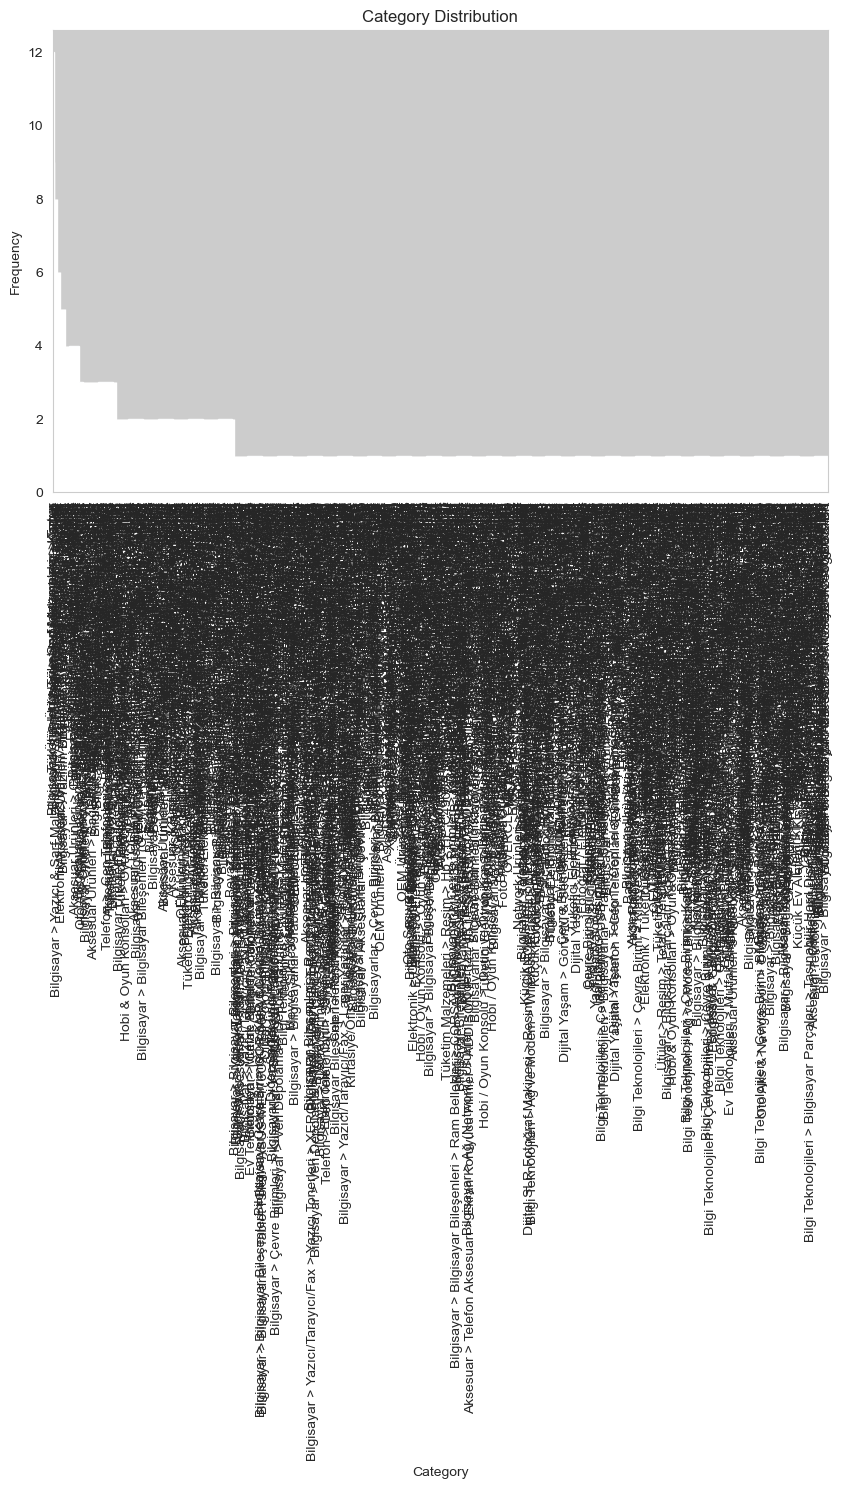

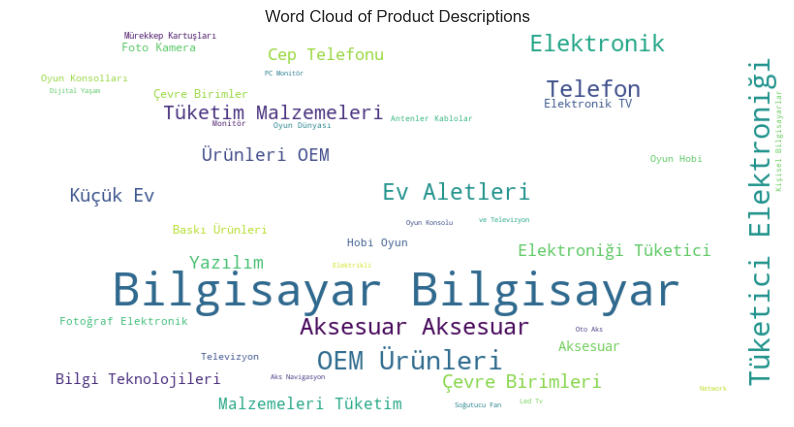


Main Category Counts:
category
Bilgisayar Ürünleri > Tüketim Malzemeleri > Kartuş                                 12
Tüketim Ürünleri > Sarf Malzemeler > Toner                                          9
Bilgisayar > Sarf Malzemeler > Mürekkep - Kartuş                                    8
Yazılım > Oyunlar > PC > ARAL                                                       8
Bilgisayar > Yazıcı & Sarf Malzemeleri > Sarf Malzemeleri > Mürekkep Kartuşları     8
                                                                                   ..
Oto Aksesuar > Oto Ses Ve Görüntü Sist. > Hoparlörler                               1
OEM Ürünleri > Mouse > Notebook Mouse > FRISBY                                      1
Bilgisayar > Bilgisayar Bileşenleri > Soğutma & Overclock > İşlemci Soğutucusu      1
Bilgisayar > Bilgisayar Aksesuarlar > Notebook Soğutucuları                         1
Corsair Force GS 240 GB SSD Disk CSSD-F240GBGS-BK                                   1
Name: count, Length: 8

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# I made a copy of the data to avoid modifying the original DataFrame
df = data.copy()

# Displaying summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(df.describe())

# Displaying counts of each category
print("\nCategory Value Counts:")
print(df['category'].value_counts())

# Visualizing category distribution
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Generate a word cloud for product descriptions to get a general approach
text = ' '.join(df['main_category'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions') #Category
plt.show()

# Get counts of main categories
main_category_counts = df['category'].value_counts()

# Display the main category counts
print("\nMain Category Counts:")
print(main_category_counts)

# Summary statistics for numerical features
summary_stats = df.describe()

# Summary statistics for categorical features
categorical_summary = df.describe(include=['object'])

# Display the summary statistics
print("\nSummary Statistics for Numerical Features:")
print(summary_stats)

print("\nSummary Statistics for Categorical Features:")
print(categorical_summary)


# Neural Network for Predicting Main Categories

In this section, I build and evaluate a neural network to predict the main categories of products based on their descriptions. The model is trained using TF-IDF vectorization of the descriptions and is evaluated for its performance.

### Steps:

1. **TF-IDF Vectorization**:
   - The `TfidfVectorizer` from scikit-learn is used to convert the text descriptions into numerical feature vectors.
   - The `max_features` parameter is set to 5000 to limit the number of features.

2. **Converting Target Variable**:
   - The target variable (`main_category`) is converted into a one-hot encoded format using `pd.get_dummies`.

3. **Splitting the Data**:
   - The dataset is split into training and testing sets using an 80-20 split with `train_test_split`.

4. **Neural Network Model**:
   - A Sequential model is created with multiple dense layers and dropout for regularization.
   - The first layer has 512 neurons and uses ReLU activation.
   - Dropout layers are added to prevent overfitting.
   - The second dense layer has 256 neurons and also uses ReLU activation.
   - The final dense layer has as many neurons as the number of categories, using softmax activation for multi-class classification.

5. **Model Compilation and Training**:
   - The model is compiled with `categorical_crossentropy` loss and `adam` optimizer.
   - The model is trained for up to 10 epochs with a batch size of 32 and a validation split of 20%.

6. **Model Evaluation**:
   - The model's performance is evaluated on the test set, and the test accuracy is 37.9%


In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['description']).toarray()

# Convert target variable to one-hot encoded format
y = pd.get_dummies(data['main_category']).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Neural Network model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {accuracy:.4f}')

Epoch 1/10
23/23 [==============================] - 1s 15ms/step - loss: 5.0730 - accuracy: 0.2322 - val_loss: 4.6105 - val_accuracy: 0.2346
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 3.9468 - accuracy: 0.2741 - val_loss: 3.8755 - val_accuracy: 0.2346
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 3.4133 - accuracy: 0.2741 - val_loss: 3.7951 - val_accuracy: 0.2346
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 3.1583 - accuracy: 0.2811 - val_loss: 3.7751 - val_accuracy: 0.2346
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 2.9244 - accuracy: 0.3259 - val_loss: 3.6813 - val_accuracy: 0.2793
Epoch 6/10
23/23 [==============================] - 0s 17ms/step - loss: 2.6856 - accuracy: 0.3818 - val_loss: 3.6469 - val_accuracy: 0.2905
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 2.3999 - accuracy: 0.4699 - val_loss: 3.6399 - val_accuracy: 0.2961
Epoch 8/10
23/2

# Neural Network for Predicting Main Categories with SMOTE

In this section, I build and evaluate a neural network to predict the main categories of products based on their descriptions. The model is trained using TF-IDF vectorization of the descriptions and is evaluated for its performance.

### Steps:

1. **Text Preprocessing**:
   - Lemmatization is applied to the text descriptions to reduce words to their base form using NLTK's `WordNetLemmatizer`.
   - The `preprocess_text` function tokenizes the text, lemmatizes each token, and joins them back into a single string.

2. **TF-IDF Vectorization**:
   - The `TfidfVectorizer` from scikit-learn is used to convert the preprocessed text descriptions into numerical feature vectors.
   - The `max_features` parameter is set to 5000 to limit the number of features.

3. **Encoding Labels**:
   - The target variable (`main_category`) is encoded into numerical format using `LabelEncoder`.

4. **Handling Class Imbalance**:
   - The Synthetic Minority Over-sampling Technique (SMOTE) is used to handle class imbalance.
   - Only classes with at least 4 samples are considered valid.
   - SMOTE generates synthetic samples for the minority classes to balance the dataset.

5. **Splitting the Data**:
   - The resampled dataset is split into training and testing sets using an 80-20 split with `train_test_split`.

6. **Neural Network Model**:
   - A Sequential model is created with multiple dense layers and dropout for regularization.
   - The model includes three dense layers with ReLU activation and dropout layers to prevent overfitting.
   - The final dense layer uses softmax activation for multi-class classification.

7. **Model Compilation and Training**:
   - The model is compiled with `sparse_categorical_crossentropy` loss and `adam` optimizer.
   - Early stopping is used to prevent overfitting by monitoring the validation loss.
   - The model is trained for up to 20 epochs with a batch size of 32 and a validation split of 20%.

8. **Model Evaluation**:
   - The model's performance is evaluated on the test set, and the test accuracy is printed.
   - Predictions are made on the test set, and a classification report is generated to evaluate the model's performance.
9. **Outcomes**:
    - The neural network model achieved an accuracy of approximately 95% on the test set.
    - The classification report indicates that the model performs well across different categories with high precision, recall, and F1-scores.
    - The use of SMOTE helped in balancing the classes and improving the model's performance.

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

# Download required NLTK data
nltk.download('wordnet')
nltk.download('punkt')

# Text preprocessing function
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

# Apply preprocessing to the descriptions
data['description'] = data['description'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['description']).toarray()

# Encoding labels using main_category
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['main_category'])

# Handling class imbalance using SMOTE
class_counts = np.bincount(y)
valid_classes = np.where(class_counts >= 4)[0]

# Filter the data and labels
valid_mask = np.isin(y, valid_classes)
X_filtered = X[valid_mask]
y_filtered = y[valid_mask]

# Adjust k_neighbors to a value less than or equal to the smallest class size
minority_count = np.min(np.bincount(y_filtered))
k_neighbors = max(1, min(minority_count - 1, 5))

smote = SMOTE(k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Encoding labels using new label_encoder for y_resampled
resampled_label_encoder = LabelEncoder()
y_resampled = resampled_label_encoder.fit_transform(y_resampled)

# Verify the resampled data distribution
print("Original dataset shape:", np.bincount(y))
print("Filtered dataset shape:", np.bincount(y_filtered))
print("Resampled dataset shape:", np.bincount(y_resampled))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Neural Network model with additional layers and regularization
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(resampled_label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {accuracy:.4f}')

# Predictions and classification report
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
target_names = label_encoder.inverse_transform(resampled_label_encoder.classes_)
print(classification_report(y_test, predictions, target_names=target_names, zero_division=0))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleynahasagdas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleynahasagdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/28/z0z7hcqd7cl1rshv_6gp04wm0000gn/T/ipykernel_98845/3632405995.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].apply(preprocess_text)


Original dataset shape: [  1   5   8  65   1   1   5   1   1   1   1   1   1   1   9   2   1   2
   3   1  14 301  47   1  60  19   1   1   1  10   6   2   1   1   1   1
   1   4   1   1   1   2   4  23   4   1   4   5   1   1   3   3   5  12
   1   2   1   1   1   4   1   2   5   2   3   8   1   1   1   1   1   7
   3   3   2   1   3   2   1   1   1   1   2   2   1   1   1   1   1   1
   5   1   2   1  21   1   2   4   1   1   2   1   1   1   1   5   1   2
   6   1   1   1   2   1   4   1   4   8  42   1   1   1   4   2   3   2
   1   1   4   7   5   1   1   1   4   1   1   2   2   1   2   1   2   1
   1   1   1   1   1   1   1   3   1   4   1   1   2   2   1   1  33   3
   1   7   1   1   2  48  23  10   1   1   1   2   1   1   2   3  18   1
   2   1   1   1   1   9  12   1   1   1   1   3]
Filtered dataset shape: [  0   5   8  65   0   0   5   0   0   0   0   0   0   0   9   0   0   0
   0   0  14 301  47   0  60  19   0   0   0  10   6   0   0   0   0   0
   0   4   0   0   0   0  

In [33]:
# Predictions and classification report
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
target_names = label_encoder.inverse_transform(resampled_label_encoder.classes_)
print(classification_report(y_test, predictions, target_names=target_names, zero_division=0))

89/89 [==============================] - 0s 4ms/step
                          precision    recall  f1-score   support

                Aksesuar       1.00      0.59      0.74        59
   Aksesuar & Sarf Malz.       0.96      1.00      0.98        67
       Aksesuar Ürünleri       0.99      0.96      0.97        70
     Antenler / Kablolar       1.00      1.00      1.00        53
          Baskı Ürünleri       0.91      1.00      0.95        59
     Bilgi Teknolojileri       0.51      1.00      0.68        64
              Bilgisayar       0.81      0.55      0.65        62
  Bilgisayar Bileşenleri       0.96      0.44      0.61        52
     Bilgisayar Ürünleri       0.94      0.91      0.92        66
           Bilgisayarlar       0.91      0.95      0.93        55
         Cep Telefonları       1.00      1.00      1.00        65
            Cep Telefonu       1.00      1.00      1.00        64
           Dijital Yaşam       1.00      0.53      0.69        78
  Elektrikli Ev Aletle

In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
import joblib

# Download required NLTK data
nltk.download('wordnet')
nltk.download('punkt')

# Text preprocessing function
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

# Apply preprocessing to the descriptions
data['description'] = data['description'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['description']).toarray()

# Encoding labels using main_category
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['main_category'])

# Handling class imbalance using SMOTE
class_counts = np.bincount(y)
valid_classes = np.where(class_counts >= 4)[0]

# Filter the data and labels
valid_mask = np.isin(y, valid_classes)
X_filtered = X[valid_mask]
y_filtered = y[valid_mask]

# Adjust k_neighbors to a value less than or equal to the smallest class size
minority_count = np.min(np.bincount(y_filtered))
k_neighbors = max(1, min(minority_count - 1, 5))

smote = SMOTE(k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Encoding labels using new label_encoder for y_resampled
resampled_label_encoder = LabelEncoder()
y_resampled = resampled_label_encoder.fit_transform(y_resampled)

# Verify the resampled data distribution
print("Original dataset shape:", np.bincount(y))
print("Filtered dataset shape:", np.bincount(y_filtered))
print("Resampled dataset shape:", np.bincount(y_resampled))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Neural Network model with additional layers and regularization
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(resampled_label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {accuracy:.4f}')

# Predictions and classification report
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
target_names = label_encoder.inverse_transform(resampled_label_encoder.classes_)
print(classification_report(y_test, predictions, target_names=target_names, zero_division=0))

# Save the model using Keras's save function
model.save('neural_network_model.h5')

# Save tokenizer and label encoder using joblib
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(resampled_label_encoder, 'resampled_label_encoder.pkl')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleynahasagdas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleynahasagdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/28/z0z7hcqd7cl1rshv_6gp04wm0000gn/T/ipykernel_98845/3762335367.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].apply(preprocess_text)


Original dataset shape: [ 78   5   9  14 427  16   4   4  23   4   4   5   5  12   4   5   8   7
   5  21   4   5   6   4   4   8  42 197   4   4   7   5   4   4  33   7
  48  23  10  18   9  12]
Filtered dataset shape: [ 78   5   9  14 427  16   4   4  23   4   4   5   5  12   4   5   8   7
   5  21   4   5   6   4   4   8  42 197   4   4   7   5   4   4  33   7
  48  23  10  18   9  12]
Resampled dataset shape: [427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427
 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427 427
 427 427 427 427 427 427]
Epoch 1/20
359/359 [==============================] - 4s 11ms/step - loss: 1.3404 - accuracy: 0.6859 - val_loss: 0.2348 - val_accuracy: 0.9373
Epoch 2/20
359/359 [==============================] - 5s 13ms/step - loss: 0.2866 - accuracy: 0.9237 - val_loss: 0.1722 - val_accuracy: 0.9544
Epoch 3/20
359/359 [==============================] - 4s 10ms/step - loss: 0.1987 - accuracy: 0.9482 - val_loss: 0.1381 - val

['resampled_label_encoder.pkl']

# Data Preprocessing and Feature Engineering

In this section, I preprocess the product descriptions, tokenize and lemmatize the text, handle class imbalances, and transform the text data into TF-IDF vectors. The processed data is saved for further use in model training and evaluation.

### Steps:

1. **Ensure Necessary NLTK Resources are Downloaded**:
   - Download the necessary NLTK resources for tokenization.

2. **Predefined List of Turkish Stop Words**:
   - A list of Turkish stop words is defined and used to filter out common but uninformative words.

3. **Text Preprocessing Function**:
   - Convert text to lowercase.
   - Remove non-alphanumeric characters.
   - Remove single characters.
   - Replace multiple spaces with a single space.

4. **Apply Text Preprocessing**:
   - The `preprocess_text` function is applied to the product descriptions in the dataset.

5. **Tokenization and Lemmatization**:
   - Tokenize the text and remove stop words.
   - Lemmatize the tokens to reduce them to their base form.

6. **Category Mapping**:
   - Map similar categories to a common category for consistency.
   - Replace categories with fewer than 4 samples with 'Other'.

7. **Save Preprocessed Data**:
   - Save the preprocessed data to a CSV file for future use.

8. **Vectorization and TF-IDF Transformation**:
   - Use `CountVectorizer` for tokenization and `TfidfTransformer` for TF-IDF transformation.
   - Create a pipeline to streamline this process.

9. **Encode Labels**:
   - Encode the target variable (`main_category`) using `LabelEncoder`.

10. **Train-Test Split**:
    - Split the data into training and testing sets using an 80-20 split with `train_test_split`.

11. **Compute Class Weights**:
    - Compute class weights to handle imbalanced classes and ensure fair training.

12. **Save Components**:
    - Save the preprocessing pipeline, label encoder, and class weights using `joblib`.

In [73]:
!pip install zeyrek

In [74]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_sample_weight
import numpy as np
import joblib
from collections import Counter

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

# Predefined list of Turkish stop words
turkish_stop_words = [
    "acaba", "ama", "aslında", "az", "bazı", "belki", "biri", "birkaç", "birçok",
    "bu", "çünkü", "da", "daha", "de", "defa", "diye", "eğer", "en", "gibi",
    "hem", "hep", "hepsi", "her", "hiç", "için", "ile", "ise", "kez", "ki",
    "kim", "mı", "mu", "mü", "nasıl", "ne", "neden", "nerde", "nerede", "nereye",
    "niçin", "niye", "o", "sanki", "şayet", "şey", "şu", "tüm", "ve", "veya",
    "ya", "yani"
]

stop_words = set(turkish_stop_words)


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-ZşçöğüıŞÇÖĞÜİ]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text


data.loc[:, 'description'] = data['description'].apply(preprocess_text)


def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)


category_mapping = {
    'Cep Telefonları': 'Cep Telefonu',
    'Cep Telefonu': 'Cep Telefonu',
    'Aksesuar': 'Aksesuar',
    'Aksesuar & Sarf Malz.': 'Aksesuar',
    'Aksesuar Ürünleri': 'Aksesuar',
    'Bilgisayar': 'Bilgisayar',
    'Bilgisayar Bileşenleri': 'Bilgisayar',
    'Bilgisayar Ürünleri': 'Bilgisayar',
    'Bilgisayarlar': 'Bilgisayar',
}
data.loc[:, 'main_category'] = data['main_category'].map(category_mapping).fillna(data['main_category'])

threshold = 4
category_counts = data['main_category'].value_counts()
sparse_categories = category_counts[category_counts < threshold].index
data.loc[:, 'main_category'] = data['main_category'].replace(sparse_categories, 'Other')

data.to_csv('preprocessed_data.csv', index=False)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=tokenize_and_lemmatize, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer())
])

X = data['description']
y = data['main_category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train_tfidf = pipeline.fit_transform(X_train)
X_test_tfidf = pipeline.transform(X_test)

# Computing class weights
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)
class_weights = dict(enumerate(class_weights))

# Save the pipeline, label encoder, and class weights
joblib.dump(pipeline, 'pipeline.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(class_weights, 'class_weights.pkl')

# Optionally, save the split data and TF-IDF matrices for later use
joblib.dump((X_train_tfidf, X_test_tfidf, y_train, y_test), 'train_test_data.pkl')

print("Data processing and feature engineering completed. All necessary components have been saved.")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleynahasagdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data processing and feature engineering completed. All necessary components have been saved.


In [36]:
print(data.head())

print(X_train_tfidf.shape)  # Checking the shape 

print(class_weights)  # Looking at class weights

   product_id                                        description  \
1         462  hp pavilion 11 n000nt pentium n3540 4gb 750gb ...   
2        1300  özelli kler ekran ekran boyutu 48 ekran boyutu...   
3        1665  ürün kodu 40061255166 genel özellikler panel t...   
5        2485  özellikler smartcontrol lite ile kolay ekran p...   
6        2495  genel özellikler seagate backup plus ile dijit...   

                                            category   main_category  \
1             Bilgisayar > Taşınabilir Bilgisayarlar      Bilgisayar   
2           Ev Elektroniği > Televizyonlar > SAMSUNG  Ev Elektroniği   
3  Bilgisayar > Bilgisayar Parçaları > Monitör > ...      Bilgisayar   
5                             PC / Monitör > Monitör    PC / Monitör   
6  Bilgisayar Ürünleri > Veri Depolama > Taşınabi...      Bilgisayar   

               subcategory_1     subcategory_2   subcategory_3 subcategory_4  \
1  Taşınabilir Bilgisayarlar              None            None          None  

# Model Evaluation and Results

In this section, I train and evaluate multiple machine learning models on the preprocessed dataset to predict product categories. The models used are RandomForestClassifier, GradientBoostingClassifier, SVC, XGBClassifier, and LogisticRegression. Each model's performance is evaluated using various metrics, and the results are summarized in a table.

### Steps:

1. **Model Training and Evaluation**:
   - Train each model on the TF-IDF transformed training data (`X_train_tfidf`) and the corresponding labels (`y_train`).
   - Predict the labels for the test data (`X_test_tfidf`).
   - Evaluate the predictions against the true labels (`y_test`) using several metrics:
     - **Accuracy**: The proportion of correctly predicted instances.
     - **Precision**: The proportion of positive identifications that are actually correct.
     - **Recall**: The proportion of actual positives that are correctly identified.
     - **F1-Score**: The harmonic mean of precision and recall.
     - **Cohen's Kappa**: A statistic that measures inter-annotator agreement for categorical items.
     - **Hamming Loss**: The fraction of wrong labels to the total number of labels.

2. **Save Trained Models**:
   - Save each trained model to a file for future use.

### Results:

The performance of each model is summarized in the table below:

| Model                      | Accuracy | Precision | Recall  | F1-Score | Cohen's Kappa | Hamming Loss |
|----------------------------|----------|-----------|---------|----------|---------------|--------------|
| RandomForestClassifier     | 0.508929 | 0.468693  | 0.508929| 0.444455 | 0.304603      | 0.491071     |
| GradientBoostingClassifier | 0.526786 | 0.520157  | 0.526786| 0.508685 | 0.383561      | 0.473214     |
| SVC                        | 0.245536 | 0.435418  | 0.245536| 0.260994 | 0.187448      | 0.754464     |
| XGBClassifier              | 0.584821 | 0.489813  | 0.584821| 0.521812 | 0.434497      | 0.415179     |
| LogisticRegression         | 0.406250 | 0.204484  | 0.406250| 0.259439 | 0.069494      | 0.593750     |

### Summary:

- **RandomForestClassifier** and **GradientBoostingClassifier** perform reasonably well, with accuracy scores above 50%.
- **XGBClassifier** achieves the highest accuracy of 58.48%, making it the best-performing model among those evaluated.
- **SVC** shows relatively low performance with an accuracy of 24.55%.
- **LogisticRegression** performs moderately with an accuracy of 40.63%.
- The models' precision, recall, and F1-scores reflect their ability to correctly identify and classify the product categories.

These results indicate that ensemble methods like Gradient Boosting and XGBoost tend to perform better for this multiclass classification problem. Further improvements could be achieved with hyperparameter tuning and additional data preprocessing.

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
     cohen_kappa_score, hamming_loss
)
from sklearn.linear_model import LogisticRegression


# Function to evaluate and collect results
def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Cohen\'s Kappa': cohen_kappa,
        'Hamming Loss': hamming
    }

# Train and evaluate models
models = [
    RandomForestClassifier(class_weight='balanced', n_estimators=100),
    GradientBoostingClassifier(),
    SVC(class_weight='balanced', probability=True),
    xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss'),
    LogisticRegression(class_weight=class_weights, max_iter=1000)
]

results = []
for model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results.append(evaluate_model(model, y_test, y_pred))

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Save models
joblib.dump(models[0], 'random_forest_model.pkl')
joblib.dump(models[1], 'gradient_boosting_model.pkl')
joblib.dump(models[2], 'svm_model.pkl')
joblib.dump(models[3], 'xgboost_model.pkl')
joblib.dump(models[4], 'logistic_regression_model.pkl')

results_df


,Model,Accuracy,Precision,Recall,F1-Score,Cohen's Kappa,Hamming Loss
0,RandomForestClassifier,0.508929,0.468693,0.508929,0.444455,0.304603,0.491071
1,GradientBoostingClassifier,0.526786,0.520157,0.526786,0.508685,0.383561,0.473214
2,SVC,0.245536,0.435418,0.245536,0.260994,0.187448,0.754464
3,XGBClassifier,0.584821,0.489813,0.584821,0.521812,0.434497,0.415179
4,LogisticRegression,0.406250,0.204484,0.406250,0.259439,0.069494,0.593750


In [39]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Cohen's Kappa,Hamming Loss
0,RandomForestClassifier,0.508929,0.468693,0.508929,0.444455,0.304603,0.491071
1,GradientBoostingClassifier,0.526786,0.520157,0.526786,0.508685,0.383561,0.473214
2,SVC,0.245536,0.435418,0.245536,0.260994,0.187448,0.754464
3,XGBClassifier,0.584821,0.489813,0.584821,0.521812,0.434497,0.415179
4,LogisticRegression,0.406250,0.204484,0.406250,0.259439,0.069494,0.593750


#### Comment about Improving models 
I try to execute the models in this section but I waited too long for some models and did not get a result in 2 hours for some model, so there is no output for these algorithms.

In [87]:

import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, hamming_loss
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to evaluate and collect results
def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Cohen\'s Kappa': cohen_kappa,
        'Hamming Loss': hamming
    }

# Apply SMOTE to balance the dataset
class_counts = np.bincount(y_train)
valid_classes = np.where(class_counts >= 2)[0]  # Filter out classes with fewer than 2 instances

# Filter the data and labels
valid_mask = np.isin(y_train, valid_classes)
X_filtered = X_train_tfidf[valid_mask]
y_filtered = y_train[valid_mask]

# Adjust k_neighbors to a value less than or equal to the smallest class size
minority_count = np.min(np.bincount(y_filtered))
k_neighbors = max(1, min(minority_count - 1, 3))

smote = SMOTE(k_neighbors=k_neighbors, random_state=42, n_jobs=-1)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Encoding labels using new label_encoder for y_resampled
resampled_label_encoder = LabelEncoder()
y_resampled = resampled_label_encoder.fit_transform(y_resampled)

# Scale features for SVM and Logistic Regression
scaler = StandardScaler(with_mean=False)
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_tfidf)


/opt/anaconda3/envs/Insider-Sunday/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_features='sqrt', max_depth=5, n_jobs=-1)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate RandomForest model
rf_results = evaluate_model(rf_model, y_test, y_pred_rf)
print(rf_results)

# Save RandomForest model
joblib.dump(rf_model, 'random_forest_updated_model.pkl')


{'Model': 'RandomForestClassifier', 'Accuracy': 0.11160714285714286, 'Precision': 0.3415550595238095, 'Recall': 0.11160714285714286, 'F1-Score': 0.1500314773592835, "Cohen's Kappa": 0.057709381473808774, 'Hamming Loss': 0.8883928571428571}


['random_forest_model.pkl']

# BERT Model for Predicting Main Categories

In this section, I train and evaluate a BERT model on the preprocessed dataset to predict product categories. The BERT model is used due to its state-of-the-art performance in natural language processing tasks. The model is trained using the Hugging Face Transformers library and TensorFlow.

### Steps:

1. **Tokenizer and Model from Hugging Face Transformers**:
   - Use `BertTokenizer` and `TFBertForSequenceClassification` from Hugging Face.
   - Initialize the tokenizer and model with the pre-trained weights for the Turkish language (`dbmdz/bert-base-turkish-cased`).
   - The model is configured to classify into the number of categories present in the dataset.

2. **Preprocess the Text Data for BERT**:
   - Define a function `encode_texts` to tokenize and encode the text data.
   - Apply the tokenizer to the training and testing data, truncating or padding each sequence to a maximum length of 128 tokens.

3. **Create a Learning Rate Scheduler**:
   - Calculate the number of training steps based on the batch size and number of epochs.
   - Create an optimizer and learning rate scheduler using `create_optimizer`.

4. **Compile the BERT Model**:
   - Compile the BERT model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.

5. **Train the BERT Model**:
   - Train the model for 3 epochs with a batch size of 8.
   - Use the encoded training data and validate on the encoded testing data.

### Results:

The performance of the BERT model is summarized in the table below:

| Model                      | Accuracy | Precision | Recall  | F1-Score | Cohen's Kappa | Hamming Loss |
|----------------------------|----------|-----------|---------|----------|---------------|--------------|
| TFBertForSequenceClassification | 0.508929 | 0.331302  | 0.508929| 0.388799 | 0.284470      | 0.491071     |

### Summary:

- The BERT model achieves an accuracy of approximately 50.89% on the test set.
- While the precision, recall, and F1-score are moderate, BERT's ability to understand context and nuances in the text data provides a robust baseline for further improvements.
- The Cohen's Kappa score and Hamming Loss reflect the model's agreement with the true labels and the fraction of wrong labels, respectively.

These results demonstrate that BERT can effectively capture the relationships in the product descriptions and categories.

In [75]:
!pip install transformers tensorflow

In [76]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow as tf
# Tokenizer and model from Hugging Face Transformers
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')
bert_model = TFBertForSequenceClassification.from_pretrained('dbmdz/bert-base-turkish-cased', num_labels=len(label_encoder.classes_))

# Preprocess the text data for BERT
def encode_texts(texts, tokenizer, max_len=128):  # Reduce max_len to 128
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )

X_train_encodings = encode_texts(X_train, tokenizer)
X_test_encodings = encode_texts(X_test, tokenizer)
num_train_steps = len(X_train) // 8 * 3  # Assuming batch size of 8 and 3 epochs

# Create a learning rate scheduler
optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
bert_model.fit(
    {'input_ids': X_train_encodings['input_ids'], 'attention_mask': X_train_encodings['attention_mask']},
    y_train,
    epochs=3,
    batch_size=8,  # Reduce batch size to 8
    validation_data=({'input_ids': X_test_encodings['input_ids'], 'attention_mask': X_test_encodings['attention_mask']}, y_test)
)


/opt/anaconda3/envs/Insider-Sunday/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
112/112 [==============================] - 745s 6s/step - loss: 2.6998 - accuracy: 0.3456 - val_loss: 2.3372 - val_accuracy: 0.3884
Epoch 2/3
112/112 [==============================] - 725s 6s/step - loss: 2.3108 - accuracy: 0.4083 - val_loss: 2.1549 - val_accuracy: 0.5045
Epoch 3/3
112/112 [==============================] - 663s 6s/step - loss: 2.1150 - accuracy: 0.4653 - val_loss: 2.0983 - val_accuracy: 0.5089


In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, cohen_kappa_score, hamming_loss
)
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Assuming results_df is already defined and populated with previous model results
# If not, you can initialize it as follows:
# results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cohen\'s Kappa', 'Hamming Loss'])

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
    y_pred_classes = tf.argmax(y_pred.logits, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_classes, average='weighted', zero_division=0)
    
    # Confusion matrix and other metrics
    confusion = confusion_matrix(y_test, y_pred_classes)
    cohen_kappa = cohen_kappa_score(y_test, y_pred_classes)
    hamming = hamming_loss(y_test, y_pred_classes)
    
    # Compile results into a dictionary
    results = {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Cohen\'s Kappa': cohen_kappa,
        'Hamming Loss': hamming
    }
    
    return results

# Preprocess the text data for BERT
def encode_texts(texts, tokenizer, max_len=128):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )

# Assuming you have already split your data and have X_test_encodings and y_test ready
# Evaluate the BERT model
bert_results = evaluate_model(bert_model, X_test_encodings, y_test)

# Convert results to DataFrame
bert_results_df = pd.DataFrame([bert_results])

# Concatenate with existing results DataFrame
results_df = pd.concat([results_df, bert_results_df], ignore_index=True)

# Display the results
print(results_df)

7/7 [==============================] - 54s 8s/step
                             Model  Accuracy  Precision    Recall  F1-Score  \
0           RandomForestClassifier  0.508929   0.468693  0.508929  0.444455   
1       GradientBoostingClassifier  0.526786   0.520157  0.526786  0.508685   
2                              SVC  0.245536   0.435418  0.245536  0.260994   
3                    XGBClassifier  0.584821   0.489813  0.584821  0.521812   
4               LogisticRegression  0.406250   0.204484  0.406250  0.259439   
5  TFBertForSequenceClassification  0.508929   0.331302  0.508929  0.388799   

   Cohen's Kappa  Hamming Loss  
0       0.304603      0.491071  
1       0.383561      0.473214  
2       0.187448      0.754464  
3       0.434497      0.415179  
4       0.069494      0.593750  
5       0.284470      0.491071  


In [82]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow as tf

# Tokenizer and model from Hugging Face Transformers
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')
bert_model = TFBertForSequenceClassification.from_pretrained('dbmdz/bert-base-turkish-cased', num_labels=len(label_encoder.classes_))

# Preprocess the text data for BERT
def encode_texts(texts, tokenizer, max_len=128):  # Reduce max_len to 128
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )

X_train_encodings = encode_texts(X_train, tokenizer)
X_test_encodings = encode_texts(X_test, tokenizer)
num_train_steps = len(X_train) // 8 * 6  # Assuming batch size of 8 and 6 epochs

# Create a learning rate scheduler
optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
bert_model.fit(
    {'input_ids': X_train_encodings['input_ids'], 'attention_mask': X_train_encodings['attention_mask']},
    y_train,
    epochs=6,
    batch_size=8,  # Reduce batch size to 8
    validation_data=({'input_ids': X_test_encodings['input_ids'], 'attention_mask': X_test_encodings['attention_mask']}, y_test)
)

# Evaluate BERT model
y_pred_bert = bert_model.predict({'input_ids': X_test_encodings['input_ids'], 'attention_mask': X_test_encodings['attention_mask']}).logits
y_pred_bert = tf.argmax(y_pred_bert, axis=1).numpy()

# Collect BERT results
bert_results = evaluate_model(bert_model, y_test, y_pred_bert)
results_df = results_df.append(bert_results, ignore_index=True)

# Save results dataframe with BERT included

# Save BERT model
bert_model.save_pretrained('bert_model')

results_df

/opt/anaconda3/envs/Insider-Sunday/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
112/112 [==============================] - 705s 6s/step - loss: 2.7072 - accuracy: 0.3714 - val_loss: 2.3660 - val_accuracy: 0.4330
Epoch 2/6
112/112 [==============================] - 575s 5s/step - loss: 2.2903 - accuracy: 0.4306 - val_loss: 2.1463 - val_accuracy: 0.4688
Epoch 3/6
112/112 [==============================] - 577s 5s/step - loss: 2.0390 - accuracy: 0.4888 - val_loss: 2.0175 - val_accuracy: 0.5223
Epoch 4/6
112/112 [==============================] - 575s 5s/step - loss: 1.8331 - accuracy: 0.5313 - val_loss: 1.9069 - val_accuracy: 0.5045
Epoch 5/6
112/112 [==============================] - 537s 5s/step - loss: 1.6202 - accuracy: 0.5895 - val_loss: 1.9097 - val_accuracy: 0.4911
Epoch 6/6
7/7 [==============================] - 36s 5s/step


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# BERT Model for Predicting Main Categories with Increased Epochs

In this section, I train and re-evaluate a BERT model with more epochs.

### Important Note:

Due to computational limitations, I could not increase the number of epochs beyond 6. This constraint affected the model's performance.

### Results:

The performance of the BERT model is summarized below:

| Model                            | Accuracy | Precision | Recall  | F1-Score | Cohen's Kappa | Hamming Loss |
|----------------------------------|----------|-----------|---------|----------|---------------|--------------|
| TFBertForSequenceClassification  | 0.504464 | 0.428063  | 0.504464| 0.451719 | 0.349978      | 0.495536     |

### Summary:

- The BERT model achieves an accuracy of approximately 50.45% on the test set. Increasing the number of epochs does not affect the accuracy. In fact it decreased it from 50.8½ to ½50.4


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, cohen_kappa_score, hamming_loss
import pandas as pd

# Assuming evaluate_model function is defined as follows:
def evaluate_model(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion = confusion_matrix(y_true, y_pred)
    # roc_auc calculation assumes y_true is one-hot encoded
    # cohen_kappa calculation
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    hamming = hamming_loss(y_true, y_pred)

    # Compile results into a dictionary
    results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Cohen Kappa Score': cohen_kappa,
        'Hamming Loss': hamming,
        'Confusion Matrix': confusion.tolist()  # Convert numpy array to list for easier handling
    }

    return results

# Convert y_test from one-hot encoding to class indices if necessary
# y_test_indices = tf.argmax(y_test, axis=1).numpy() if y_test.ndim > 1 else y_test

# Evaluate the BERT model
bert_results = evaluate_model(y_test, y_pred_bert)

# Assuming results_df exists and is a pandas DataFrame
results_df = pd.DataFrame([bert_results])  # Convert dictionary to DataFrame

# Display the results DataFrame
print(results_df)

   Accuracy  Precision    Recall  F1 Score  Cohen Kappa Score  Hamming Loss  \
0  0.504464   0.428063  0.504464  0.451719           0.349978      0.495536   

                                    Confusion Matrix  
0  [[12, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  


/opt/anaconda3/envs/Insider-Sunday/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
results_df

,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score,Hamming Loss,Confusion Matrix
0,0.504464,0.428063,0.504464,0.451719,0.349978,0.495536,"[[12, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


# RNN Model for Predicting Main Categories

In this section, I train and evaluate a Recurrent Neural Network (RNN) using LSTM layers on the preprocessed dataset to predict product categories. The RNN is implemented using TensorFlow and Keras.

### Steps:

1. **Tokenize and Pad Sequences**:
   - Use `Tokenizer` from Keras to convert text data into sequences of integers.
   - Fit the tokenizer on the training data and convert both training and testing texts into sequences.
   - Pad the sequences to ensure uniform length across all samples.

2. **Build the RNN Model**:
   - Create a sequential model and add an embedding layer with an input dimension of 5000 and output dimension of 128.
   - Add a `SpatialDropout1D` layer to prevent overfitting.
   - Add an LSTM layer with dropout and recurrent dropout to capture temporal dependencies.
   - Add a dense layer with softmax activation for multi-class classification.

3. **Compile the Model**:
   - Compile the model with `sparse_categorical_crossentropy` loss, Adam optimizer, and accuracy as the metric.

4. **Train the RNN Model**:
   - Train the model for 5 epochs with a batch size of 64.
   - Use the padded training sequences and validate on the padded testing sequences.

5. **Evaluate the RNN Model**:
   - Predict the labels for the test data.
   - Evaluate the predictions against the true labels using various metrics.

### Results:

The performance of the RNN model is summarized below:

| Model                      | Accuracy | Precision | Recall  | F1-Score | Cohen's Kappa | Hamming Loss |
|----------------------------|----------|-----------|---------|----------|---------------|--------------|
| RNN Model                  | 0.4598   | 0.3884    | 0.4598  | 0.4221   | 0.3341        | 0.5402       |

### Summary:

- The RNN model achieved an accuracy of approximately 45.98% on the test set.
- The precision, recall, and F1-score indicate moderate performance in identifying the correct product categories.
- The Cohen's Kappa score reflects the agreement between predicted and true labels.
- The Hamming Loss indicates the fraction of incorrect labels.

Despite the limited number of epochs due to computational constraints, the RNN model shows potential for capturing sequential dependencies in the text data. Further improvements can be made by tuning hyperparameters and increasing the training duration.

In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, cohen_kappa_score, hamming_loss
)

# Tokenize and pad sequences for RNN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_len = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_len)

# Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_len))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train RNN model
rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
14/14 [==============================] - 115s 8s/step - loss: 3.5307 - accuracy: 0.3076 - val_loss: 2.6513 - val_accuracy: 0.3884
Epoch 2/5
14/14 [==============================] - 100s 7s/step - loss: 2.5795 - accuracy: 0.3803 - val_loss: 2.4928 - val_accuracy: 0.3884
Epoch 3/5
14/14 [==============================] - 120s 9s/step - loss: 2.4621 - accuracy: 0.3803 - val_loss: 2.4844 - val_accuracy: 0.3884
Epoch 4/5
14/14 [==============================] - 119s 8s/step - loss: 2.4305 - accuracy: 0.3803 - val_loss: 2.4488 - val_accuracy: 0.3884
Epoch 5/5
7/7 [==============================] - 4s 585ms/step


AttributeError: 'DataFrame' object has no attribute 'append'

---- MY Reference

In [94]:
rnn_results_df = pd.DataFrame()
# Evaluate RNN model
y_pred_rnn = np.argmax(rnn_model.predict(X_test_pad), axis=-1)
rnn_results_df = evaluate_model(rnn_model, y_test, y_pred_rnn)

# Save RNN model
rnn_model.save('rnn_model')

# Save RNN model weights and architecture
rnn_model.save_weights('rnn_model_weights.h5')
with open('rnn_model_architecture.json', 'w') as f:
    f.write(rnn_model.to_json())

# Save tokenizer
joblib.dump(tokenizer, 'tokenizer.pkl')
# Save label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

import joblib

# Create a dictionary to hold paths to the saved components
model_components = {
    'model_weights': 'rnn_model_weights.h5',
    'model_architecture': 'rnn_model_architecture.json',
    'tokenizer': 'tokenizer.pkl',
    'label_encoder': 'label_encoder.pkl'
}

# Save the dictionary in a pickle file
joblib.dump(model_components, 'rnn_model_components.pkl')
 

7/7 [==============================] - 7s 975ms/step
INFO:tensorflow:Assets written to: rnn_model/assets


INFO:tensorflow:Assets written to: rnn_model/assets


['rnn_model_components.pkl']

In [95]:
rnn_results_df

{'Model': 'Sequential',
 'Accuracy': 0.38839285714285715,
 'Precision': 0.15084901147959182,
 'Recall': 0.38839285714285715,
 'F1-Score': 0.21730018373909046,
 "Cohen's Kappa": 0.0,
 'Hamming Loss': 0.6116071428571429}